In [28]:
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime
import pandas as pd


# Define the tickers
tickers = ["^DJI", "^IXIC", "BTC-USD"]

# Define the time period
start_date = "2020-04-10"
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the data
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

# Combine the data into a single DataFrame
combined_data = pd.concat(data.values(), axis=1, keys=data.keys())

# Flatten the column MultiIndex
combined_data.columns = combined_data.columns.get_level_values(0)

# Reset index to handle the Date column
combined_data.reset_index(inplace=True)

# Handle missing values
combined_data.ffill(inplace=True)  # Forward-fill missing values
combined_data.bfill(inplace=True)  # Backward-fill missing values
combined_data.dropna(inplace=True)  # Drop rows with remaining NaN (if any)

# Create the figure
fig = go.Figure()

# Add traces for each ticker
fig.add_trace(go.Scatter(x=combined_data["Date"], y=combined_data["^DJI"], mode='lines', name="Dow Jones"))
fig.add_trace(go.Scatter(x=combined_data["Date"], y=combined_data["^IXIC"], mode='lines', name="Nasdaq"))
fig.add_trace(go.Scatter(x=combined_data["Date"], y=combined_data["BTC-USD"], mode='lines', name="BTC"))

# Update layout with increased height
fig.update_layout(
    title="Historical Data for Dow Jones, NASDAQ, and BTC",
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Ticker",
    height=800  # Set the height of the graph (default is ~450-600)
)

# Show the plot
fig.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
# Define the tickers
tickers = ["^DJI", "^IXIC", "BTC-USD"]

# Define the time period
start_date = "2020-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the data
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

# Combine the data into a single DataFrame
combined_data = pd.concat(data.values(), axis=1, keys=data.keys())

# Flatten the column MultiIndex
combined_data.columns = combined_data.columns.get_level_values(0)

# Reset index to handle the Date column
combined_data.reset_index(inplace=True)

# Handle missing values
combined_data.ffill(inplace=True)  # Forward-fill missing values
combined_data.bfill(inplace=True)  # Backward-fill missing values
combined_data.dropna(inplace=True)  # Drop rows with remaining NaN (if any)

# Debug: Check for remaining NaN values
print("Missing values per column after cleaning:")
print(combined_data.isna().sum())

# Normalize the data
normalized_data = combined_data.copy()
for ticker in tickers:
    normalized_data[ticker] = combined_data[ticker] / combined_data[ticker].iloc[0]

# Create the figure
fig = go.Figure()

# Add traces for each ticker
fig.add_trace(go.Scatter(x=normalized_data["Date"], y=normalized_data["^DJI"], mode='lines', name="Dow Jones"))
fig.add_trace(go.Scatter(x=normalized_data["Date"], y=normalized_data["^IXIC"], mode='lines', name="Nasdaq"))
fig.add_trace(go.Scatter(x=normalized_data["Date"], y=normalized_data["BTC-USD"], mode='lines', name="BTC"))

# Update layout
fig.update_layout(
    title="Normalized Historical Data for Dow Jones, NASDAQ, and BTC",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Ticker"
)

# Show the plot
fig.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Missing values per column after cleaning:
Date       0
^DJI       0
^IXIC      0
BTC-USD    0
dtype: int64


# Let's have a look at the Top 3 Cryptos (Normalized):

In [30]:
# Define the tickers
tickers = ["^DJI", "^IXIC", "BTC-USD", "ETH-USD", "SOL-USD"]

# Define the time period
start_date = "2020-04-10"
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the data
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

# Combine the data into a single DataFrame
combined_data = pd.concat(data.values(), axis=1, keys=data.keys())

# Flatten the column MultiIndex
combined_data.columns = combined_data.columns.get_level_values(0)

# Reset index to handle the Date column
combined_data.reset_index(inplace=True)

# Handle missing values
combined_data.ffill(inplace=True)  # Forward-fill missing values
combined_data.bfill(inplace=True)  # Backward-fill missing values
combined_data.dropna(inplace=True)  # Drop rows with remaining NaN (if any)

# Debug: Check for remaining NaN values
print("Missing values per column after cleaning:")
print(combined_data.isna().sum())

# Normalize the data
normalized_data = combined_data.copy()
for ticker in tickers:
    normalized_data[ticker] = combined_data[ticker] / combined_data[ticker].iloc[0]

# Create the figure
fig = go.Figure()

for ticker in tickers:
    fig.add_trace(go.Scatter(
        x=combined_data["Date"],
        y=combined_data[ticker],
        mode='lines',
        name=ticker
    ))

# Update layout
fig.update_layout(
    title="Normalized Historical Data for Dow Jones, NASDAQ, BTC, ETH, AND SOL",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Ticker",
    height=750,  # Set the height of the plot in pixels
    width=1300   # Set the width of the plot in pixels
)

# Show the plot
fig.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Missing values per column after cleaning:
Date       0
^DJI       0
^IXIC      0
BTC-USD    0
ETH-USD    0
SOL-USD    0
dtype: int64


# Correlation Matrix for the BTC, Dow Jones, and the NASDAQ:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


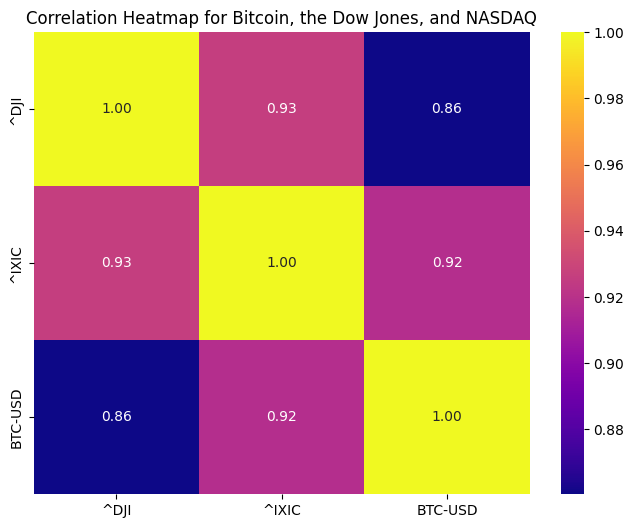

In [31]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Define the tickers
tickers = ["^DJI", "^IXIC", "BTC-USD"]

# Define the time period
start_date = "2020-04-01"
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the data
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

# Combine the data into a single DataFrame
combined_data = pd.concat(data.values(), axis=1, keys=data.keys())

# Reset index to handle MultiIndex
combined_data.reset_index(inplace=True)

# Fill NaN values with the previous day's data
combined_data.ffill(inplace=True)

# Set the "Date" column as the index
combined_data.set_index("Date", inplace=True)

# Flatten the MultiIndex columns
combined_data.columns = combined_data.columns.get_level_values(0)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Heatmap for Bitcoin, the Dow Jones, and NASDAQ')
plt.show()

# Same Visualization but with Plotly:

In [32]:
# Define the tickers
tickers = ["^DJI", "^IXIC", "BTC-USD"]

# Define the time period
start_date = "2020-04-01"
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the data
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

# Combine the data into a single DataFrame
combined_data = pd.concat(data.values(), axis=1, keys=data.keys())

# Reset index to handle MultiIndex
combined_data.reset_index(inplace=True)

# Fill NaN values with the previous day's data
combined_data.ffill(inplace=True)

# Set the "Date" column as the index
combined_data.set_index("Date", inplace=True)

# Flatten the MultiIndex columns
combined_data.columns = combined_data.columns.get_level_values(0)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plot the heatmap using Plotly
fig = px.imshow(correlation_matrix, 
                text_auto=True, 
                color_continuous_scale='viridis', 
                title='Correlation Heatmap for Bitcoin, the Dow Jones, and NASDAQ')
fig.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# How about a Scatterplot Visualization of Bitcoin and the Dow Jones Industrial Average:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


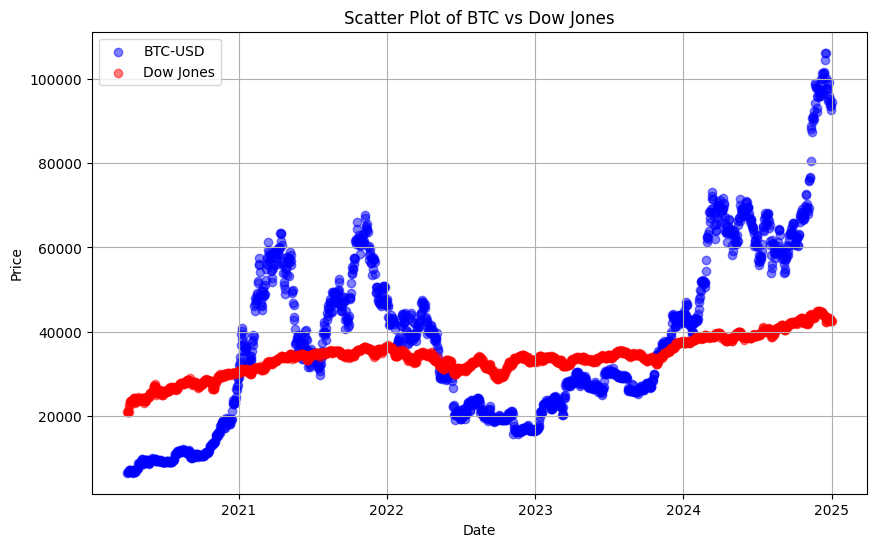

In [33]:
# Define the tickers
tickers = ["^DJI", "^IXIC", "BTC-USD"]

# Define the time period
start_date = "2020-04-01"
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the data
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

# Combine the data into a single DataFrame
combined_data = pd.concat(data.values(), axis=1, keys=data.keys())

# Reset index to handle MultiIndex
combined_data.reset_index(inplace=True)

# Fill NaN values with the previous day's data
combined_data.ffill(inplace=True)

# Set the "Date" column as the index
combined_data.set_index("Date", inplace=True)

# Flatten the MultiIndex columns
combined_data.columns = combined_data.columns.get_level_values(0)

# Scatter plot for BTC and Dow Jones
plt.figure(figsize=(10, 6))
plt.scatter(combined_data.index, combined_data['BTC-USD'], color='blue', alpha=0.5, label='BTC-USD')
plt.scatter(combined_data.index, combined_data['^DJI'], color='red', alpha=0.5, label='Dow Jones')
plt.title('Scatter Plot of BTC vs Dow Jones')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# And now a Scatterplot Visualization of Bitcoin and the NASDAQ:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


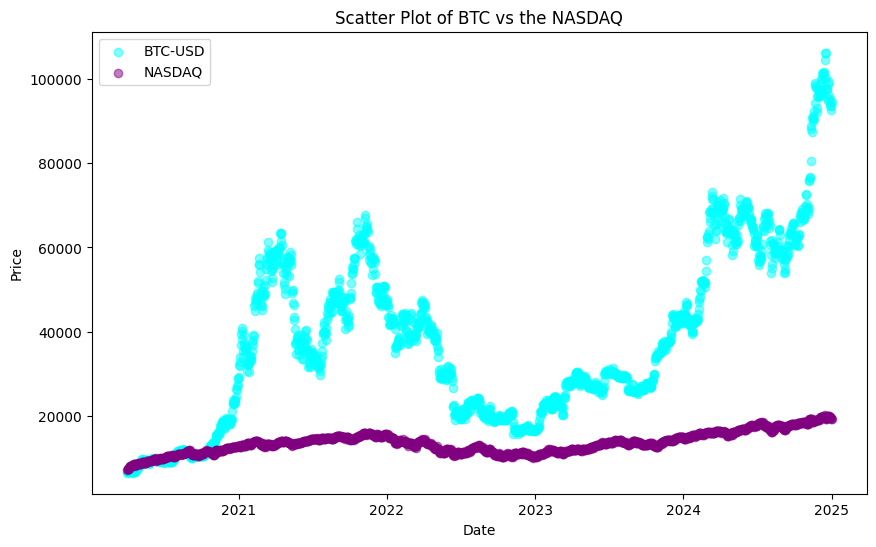

In [34]:
# Define the tickers
tickers = ["^DJI", "^IXIC", "BTC-USD"]

# Define the time period
start_date = "2020-04-01"
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the data
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

# Combine the data into a single DataFrame
combined_data = pd.concat(data.values(), axis=1, keys=data.keys())

# Reset index to handle MultiIndex
combined_data.reset_index(inplace=True)

# Fill NaN values with the previous day's data
combined_data.ffill(inplace=True)

# Set the "Date" column as the index
combined_data.set_index("Date", inplace=True)

# Flatten the MultiIndex columns
combined_data.columns = combined_data.columns.get_level_values(0)

# Scatter plot for BTC and Dow Jones
plt.figure(figsize=(10, 6))
plt.scatter(combined_data.index, combined_data['BTC-USD'], color='cyan', alpha=0.5, label='BTC-USD')
plt.scatter(combined_data.index, combined_data['^IXIC'], color='purple', alpha=0.5, label='NASDAQ')
plt.title('Scatter Plot of BTC vs the NASDAQ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Now Some Companies that either mine Bitcoin or are other Tech Stocks Heavily Connected: MicroStrategy, Marvel, MARA Holdings, Coinbase

In [35]:
# Define the tickers
tickers = ["BTC-USD", "COIN", "MARA", "MRVL", "MSTR"]


# Define the time period
start_date = "2020-04-10"
end_date = datetime.now().strftime('%Y-%m-%d')

# Fetch the data
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

# Combine the data into a single DataFrame
combined_data = pd.concat(data.values(), axis=1, keys=data.keys())

# Flatten the column MultiIndex
combined_data.columns = combined_data.columns.get_level_values(0)

# Reset index to handle the Date column
combined_data.reset_index(inplace=True)

# Handle missing values
combined_data.ffill(inplace=True)  # Forward-fill missing values
combined_data.bfill(inplace=True)  # Backward-fill missing values
combined_data.dropna(inplace=True)  # Drop rows with remaining NaN (if any)

# Debug: Check for remaining NaN values
print("Missing values per column after cleaning:")
print(combined_data.isna().sum())

# Normalize the data
normalized_data = combined_data.copy()
for ticker in tickers:
    normalized_data[ticker] = combined_data[ticker] / combined_data[ticker].iloc[0]

# Create the figure
fig = go.Figure()

for ticker in tickers:
    fig.add_trace(go.Scatter(
        x=combined_data["Date"],
        y=combined_data[ticker],
        mode='lines',
        name=ticker
    ))

# Update layout
fig.update_layout(
    title="Normalized Historical Data for Dow Jones, NASDAQ, BTC, ETH, AND SOL",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Ticker",
    height=750,  # Set the height of the plot in pixels
    width=1300   # Set the width of the plot in pixels
)

# Show the plot
fig.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Missing values per column after cleaning:
Date       0
BTC-USD    0
COIN       0
MARA       0
MRVL       0
MSTR       0
dtype: int64


# Since the Other Companies' Share Prices are so much smaller—they don't even show up on the normalized graph, thus the Correlation Matrix is more informative:

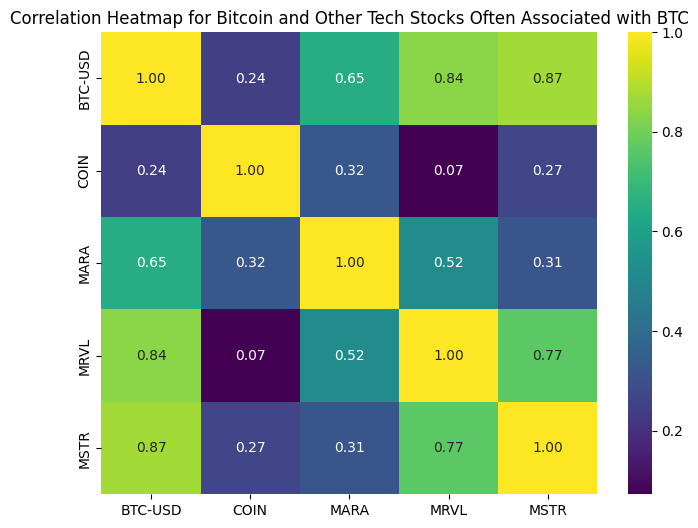

In [37]:
# Calculate the correlation matrix, excluding the "Date" column
correlation_matrix = combined_data.drop(columns=["Date"]).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap for Bitcoin and Other Tech Stocks Often Associated with BTC')
plt.show()